## Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (`lats`) and longitudes (`lngs`) as pairs by zipping them (`lat_lngs`) with the `zip()` function.

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5 Generate Random World Cities

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

# 6.2.6 Get the City Weather Data
## Import Dependencies, and Initialize and Empty List and Counters

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

## Loop Through the List of Cities and Build the City URL
## Handle API Request Errors with try-except Blocks

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | grindavik
Processing Record 7 of Set 1 | coihaique
Processing Record 8 of Set 1 | bani walid
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | concepcion del uruguay
Processing Record 11 of Set 1 | yuzhnouralsk
Processing Record 12 of Set 1 | komsomolskiy
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | lethem
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | skara
Processing Record 22 of Set 1 | sheltozero
Processing R

Processing Record 37 of Set 4 | caravelas
Processing Record 38 of Set 4 | ahipara
Processing Record 39 of Set 4 | susah
City not found. Skipping...
Processing Record 40 of Set 4 | coquimbo
Processing Record 41 of Set 4 | severo-kurilsk
Processing Record 42 of Set 4 | dicabisagan
Processing Record 43 of Set 4 | port alfred
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | beringovskiy
Processing Record 46 of Set 4 | tecoanapa
Processing Record 47 of Set 4 | cherskiy
Processing Record 48 of Set 4 | baruun-urt
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | faanui
Processing Record 1 of Set 5 | airai
Processing Record 2 of Set 5 | sambava
Processing Record 3 of Set 5 | qinggang
Processing Record 4 of Set 5 | lafiagi
Processing Record 5 of Set 5 | aktash
Processing Record 6 of Set 5 | candolim
Processing Record 7 of Set 5 | east london
Processing Record 8 of Set 5 | benguela
Processing Record 9 of Set 5 | kipini
Processing Record 10 of Se

Processing Record 27 of Set 8 | namibe
Processing Record 28 of Set 8 | bhagalpur
Processing Record 29 of Set 8 | sinnamary
Processing Record 30 of Set 8 | nanma
Processing Record 31 of Set 8 | mayo
Processing Record 32 of Set 8 | esik
Processing Record 33 of Set 8 | sterling
Processing Record 34 of Set 8 | havelock
Processing Record 35 of Set 8 | kathu
Processing Record 36 of Set 8 | pevek
Processing Record 37 of Set 8 | waihi beach
Processing Record 38 of Set 8 | casablanca
Processing Record 39 of Set 8 | volksrust
Processing Record 40 of Set 8 | avera
Processing Record 41 of Set 8 | karasburg
Processing Record 42 of Set 8 | shamgarh
Processing Record 43 of Set 8 | lipin bor
Processing Record 44 of Set 8 | igbon
Processing Record 45 of Set 8 | caibarien
Processing Record 46 of Set 8 | grand gaube
Processing Record 47 of Set 8 | panubigan
Processing Record 48 of Set 8 | dukat
Processing Record 49 of Set 8 | launceston
Processing Record 50 of Set 8 | chagda
City not found. Skipping...
P

Processing Record 18 of Set 12 | arrifes
Processing Record 19 of Set 12 | kruisfontein
Processing Record 20 of Set 12 | thinadhoo
Processing Record 21 of Set 12 | pitimbu
Processing Record 22 of Set 12 | divnomorskoye
Processing Record 23 of Set 12 | alekseyevsk
Processing Record 24 of Set 12 | bengkulu
Processing Record 25 of Set 12 | margate
Processing Record 26 of Set 12 | soe
Processing Record 27 of Set 12 | bow island
Processing Record 28 of Set 12 | sayat
Processing Record 29 of Set 12 | manono
Processing Record 30 of Set 12 | tarrega
Processing Record 31 of Set 12 | acarau
Processing Record 32 of Set 12 | jalingo
Processing Record 33 of Set 12 | kracheh
City not found. Skipping...
Processing Record 34 of Set 12 | chumikan
Processing Record 35 of Set 12 | darlington
Processing Record 36 of Set 12 | puerto escondido
Processing Record 37 of Set 12 | morondava
Processing Record 38 of Set 12 | huarmey
Processing Record 39 of Set 12 | san giovanni rotondo
Processing Record 40 of Set 1

In [10]:
len(city_data)

561

# 6.2.7 Create a DataFrame of City Weather Data

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,80.01,47,97,21.99,NZ,2021-01-26 00:12:59
1,Cape Town,-33.9258,18.4232,68.00,88,0,17.27,ZA,2021-01-26 00:12:04
2,Yellowknife,62.4560,-114.3525,-20.00,69,75,9.22,CA,2021-01-26 00:12:59
3,Saint-Philippe,-21.3585,55.7679,77.00,73,0,6.91,RE,2021-01-26 00:12:59
4,Khatanga,71.9667,102.5000,-18.96,87,100,8.99,RU,2021-01-26 00:12:59
5,Grindavik,63.8424,-22.4338,28.40,54,75,28.77,IS,2021-01-26 00:12:59
6,Coihaique,-45.5752,-72.0662,50.00,53,75,9.22,CL,2021-01-26 00:12:59
7,Bani Walid,31.7566,13.9942,58.78,41,60,10.60,LY,2021-01-26 00:13:00
8,Saskylakh,71.9167,114.0833,-33.41,82,20,4.38,RU,2021-01-26 00:13:00
9,Concepcion Del Uruguay,-32.4825,-58.2372,87.01,41,0,1.99,AR,2021-01-26 00:13:00


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-01-26 00:12:59,-46.1927,168.8643,80.01,47,97,21.99
1,Cape Town,ZA,2021-01-26 00:12:04,-33.9258,18.4232,68.00,88,0,17.27
2,Yellowknife,CA,2021-01-26 00:12:59,62.4560,-114.3525,-20.00,69,75,9.22
3,Saint-Philippe,RE,2021-01-26 00:12:59,-21.3585,55.7679,77.00,73,0,6.91
4,Khatanga,RU,2021-01-26 00:12:59,71.9667,102.5000,-18.96,87,100,8.99
5,Grindavik,IS,2021-01-26 00:12:59,63.8424,-22.4338,28.40,54,75,28.77
6,Coihaique,CL,2021-01-26 00:12:59,-45.5752,-72.0662,50.00,53,75,9.22
7,Bani Walid,LY,2021-01-26 00:13:00,31.7566,13.9942,58.78,41,60,10.60
8,Saskylakh,RU,2021-01-26 00:13:00,71.9167,114.0833,-33.41,82,20,4.38
9,Concepcion Del Uruguay,AR,2021-01-26 00:13:00,-32.4825,-58.2372,87.01,41,0,1.99


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature
## Get Data for Plotting

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

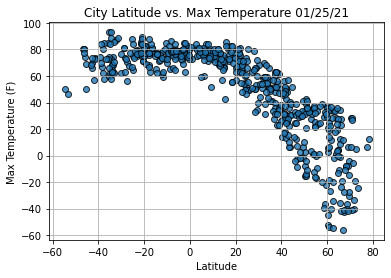

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

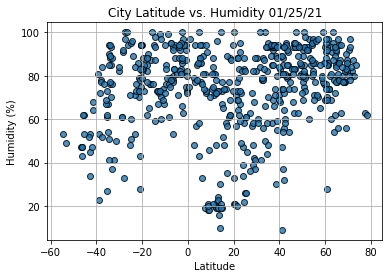

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

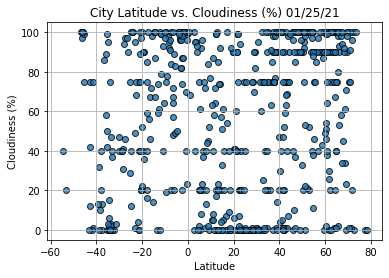

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

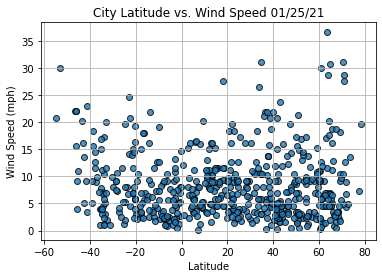

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature
## Create a Linear Regression Function

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Create the Hemisphere DataFrames

In [20]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2021-01-26 00:11:51
Lat                      -34.5322
Lng                       20.0403
Max Temp                     60.8
Humidity                       94
Cloudiness                      2
Wind Speed                   4.61
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
556     True
557     True
558    False
559     True
560    False
Name: Lat, Length: 561, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Yellowknife,CA,2021-01-26 00:12:59,62.4560,-114.3525,-20.00,69,75,9.22
4,Khatanga,RU,2021-01-26 00:12:59,71.9667,102.5000,-18.96,87,100,8.99
5,Grindavik,IS,2021-01-26 00:12:59,63.8424,-22.4338,28.40,54,75,28.77
7,Bani Walid,LY,2021-01-26 00:13:00,31.7566,13.9942,58.78,41,60,10.60
8,Saskylakh,RU,2021-01-26 00:13:00,71.9167,114.0833,-33.41,82,20,4.38
...,...,...,...,...,...,...,...,...,...
554,Mahibadhoo,MV,2021-01-26 00:14:19,3.7833,72.9667,81.18,78,93,16.15
555,Half Moon Bay,US,2021-01-26 00:14:19,37.4636,-122.4286,52.00,66,75,21.85
556,Mandalgovi,MN,2021-01-26 00:14:19,45.7625,106.2708,-4.50,81,96,7.11
557,Alugan,PH,2021-01-26 00:14:19,12.2188,125.4808,80.13,72,99,7.63


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Yellowknife,CA,2021-01-26 00:12:59,62.4560,-114.3525,-20.00,69,75,9.22
4,Khatanga,RU,2021-01-26 00:12:59,71.9667,102.5000,-18.96,87,100,8.99
5,Grindavik,IS,2021-01-26 00:12:59,63.8424,-22.4338,28.40,54,75,28.77
7,Bani Walid,LY,2021-01-26 00:13:00,31.7566,13.9942,58.78,41,60,10.60
8,Saskylakh,RU,2021-01-26 00:13:00,71.9167,114.0833,-33.41,82,20,4.38


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

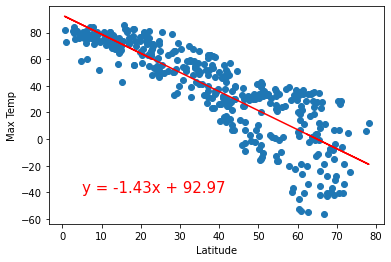

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,-40))

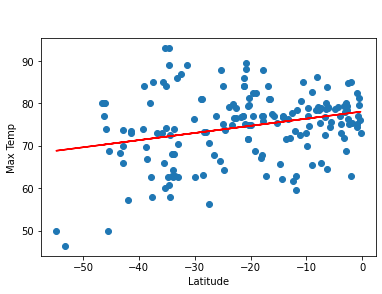

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,100))

In [27]:
# # Perform linear regression.
# linregress = linregress(x_values, y_values)
# list(linregress)

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

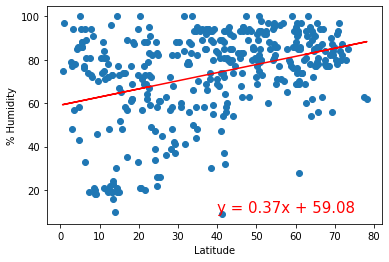

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

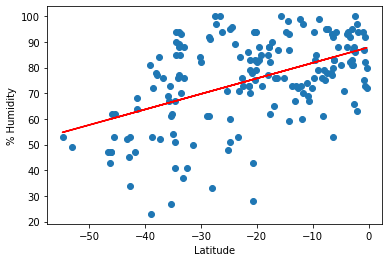

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-30,15))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

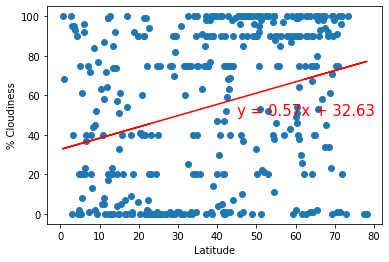

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(45,50))

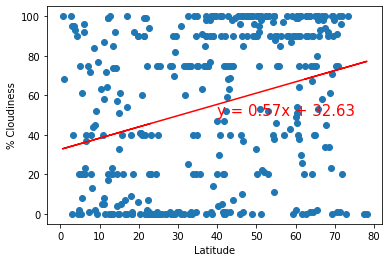

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,50))

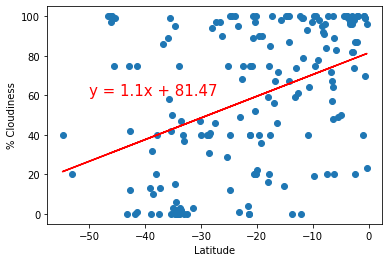

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

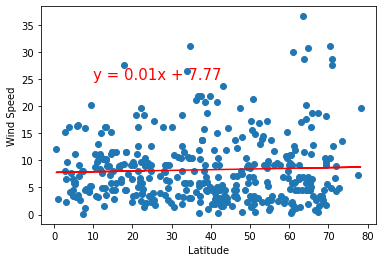

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

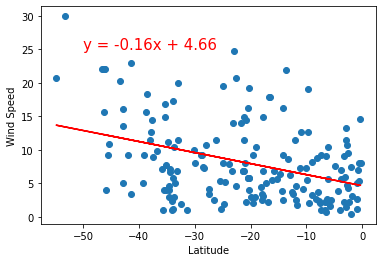

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))